In [38]:
import math 
from PIL import Image
import numpy as np
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random
from collections import defaultdict
import operator
from skimage import io
import cv2
import sys

In [2]:
image=io.imread('gagan.jpg')

In [17]:
shape(image)

(1024, 1024, 3)

In [34]:
rows=1024
columns=1024

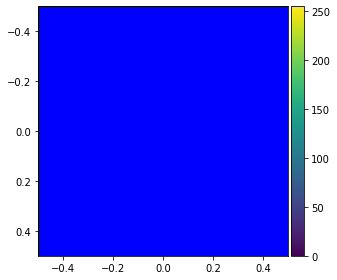

In [30]:
io.imshow(np.asarray([[[0,0,255]]]))

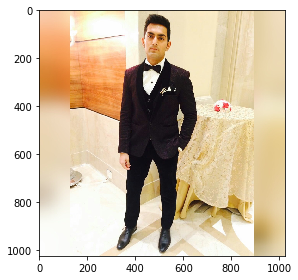

In [25]:
io.imshow(image)

In [6]:
print(image)

[[[245 204 174]
  [245 204 174]
  [245 204 174]
  ...
  [240 224 191]
  [240 224 191]
  [240 224 191]]

 [[245 204 174]
  [245 204 174]
  [245 204 174]
  ...
  [240 224 191]
  [240 224 191]
  [240 224 191]]

 [[244 203 173]
  [244 203 173]
  [244 203 173]
  ...
  [240 224 191]
  [240 224 191]
  [240 224 191]]

 ...

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [238 221 191]
  [237 220 190]
  [237 220 190]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [238 221 191]
  [237 220 190]
  [237 220 190]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [238 221 191]
  [237 220 190]
  [237 220 190]]]


In [7]:
K=6#number of clusters

In [12]:
#creating centeroids
index=[i for i in range(1024)]

index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [11]:
x_index=[]
for i in range(6):
    ind=random.randint(0,len(index)-1)
    x_index.append(index[ind])
    index.pop(ind)

In [13]:
y_index=[]
for i in range(6):
    ind=random.randint(0,len(index)-1)
    y_index.append(index[ind])
    index.pop(ind)

In [14]:
x_index

[768, 472, 376, 976, 557, 285]

In [15]:
y_index

[107, 342, 831, 640, 1008, 379]

In [32]:
red_centroids=[]
green_centroids=[]
blue_centroids=[]
for i in range(6):
    pix=image[x_index[i]][y_index[i]]
    red_centroids.append(pix[0])
    green_centroids.append(pix[1])
    blue_centroids.append(pix[2])

In [35]:
result=[[0 for i in range(1024)]for j in range(1024)]

In [33]:
red_centroids

[245, 49, 234, 246, 230, 47]

In [40]:
def check(arr,newArr):
    if len(arr)!=len(newArr):
        return False
    for i in range(len(arr)):
        if newArr[i]!=arr[i]:
            return False
    return True

In [42]:
for i in range(20):
    print("iteration ",i)
    count_arr=[0 for i in range(6)]
    red_sum=[0 for i in range(6)]
    green_sum=[0 for i in range(6)]
    blue_sum=[0 for i in range(6)]
    for r in range(rows):
        for c in range(columns):
            red=image[r][c][0]
            green=image[r][c][1]
            blue=image[r][c][2]
            ind=-1
            minDist=float('inf')
            for j in range(6):
                dist=sqrt(pow(red_centroids[j]-red,2)+pow(green_centroids[j]-green,2)+pow(blue_centroids[j]-blue,2))
                if dist<minDist:
                    minDist=dist
                    ind=j
            result[r][c]=ind
            count_arr[ind]+=1
            red_sum[ind]+=red
            green_sum[ind]+=green
            blue_sum[ind]+=blue
    new_red=[int(red_sum[i]/count_arr[i]) for i in range(6)]
    new_green=[int(green_sum[i]/count_arr[i]) for i in range(6)]
    new_blue=[int(blue_sum[i]/count_arr[i]) for i in range(6)]
    if check(red_centroids,new_red) and check(green_centroids,new_green) and check(blue_centroids,new_blue):
        break
    else:
        red_centroids=[j for j in new_red]
        green_centroids=[j for j in new_green]
        blue_centroids=[j for j in new_blue]

iteration  0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14


In [45]:
print(red_centroids,green_centroids,blue_centroids)

[238, 31, 225, 250, 200, 226] [220, 24, 199, 249, 128, 166] [188, 27, 152, 241, 56, 102]


In [46]:
countOfEachCluster=[0 for i in range(6)]
for i in range(len(result)):
    for j in range(len(result[i])):
        countOfEachCluster[result[i][j]]+=1

In [49]:
sumOfPix=0
for i in countOfEachCluster:
    sumOfPix+=i
print(countOfEachCluster,sumOfPix)

[351288, 157394, 211231, 182032, 63144, 83487] 1048576


In [48]:
1024*1024

1048576

In [50]:
resultImage=[[0 for i in range(1024)]for j in range(1024)]

In [51]:
for i in range(len(result)):
    for j in range(len(result[i])):
        red=red_centroids[result[i][j]]
        green=green_centroids[result[i][j]]
        blue=blue_centroids[result[i][j]]
        resultImage[i][j]=[red,green,blue]

/usr/local/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


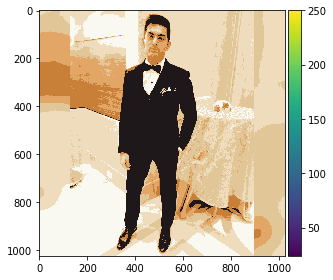

In [52]:
io.imshow(np.asarray(resultImage))

In [53]:
outputImage=np.asarray(resultImage,dtype=uint8)

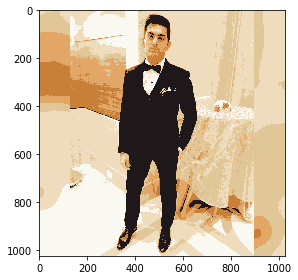

In [56]:
io.imshow(outputImage)

In [57]:
import matplotlib.pyplot as plt

In [58]:
plt.imsave('Q5.png',outputImage)